## Read in Community Land Model data for Metalearning example
##### Variable: annual mean Leaf Area Index (LAI) spatially averaged over plant functional types (PFTs)

##### Linnia Hawkins 10/23/2023

##### May need to authenticate github:  gh-scoped-creds

### Section 1: Read in and organize data

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read in CLM simulated Leaf Area Index
# data is the annual maximum LAI, temporally averaged 2003-2014, spatially averaged globally
# 501 perturbed parameter ensemble members (key: ens) the first ensemble member is the default parameterization of CLM
ds = xr.open_dataset('TLAI.nc')
pft_LAI = ds.TLAI_pft_avg_2003

In [3]:
#get the names of the PFTs (coresponding to pft index in pft_LAI dataset)
pfts = pd.read_csv('pft_names.csv')
pfts = pfts['pft_names']

In [4]:
# organize y-data 
pft_ids = [1,2,3,4,5,6,7,8,10,11,12,13,14] # We don't want to use PFTs 0,9,or 15+
yvar = np.transpose(pft_LAI.isel(pft=pft_ids).values)[1:] # drop the default ensemble member (0)
y_data = pd.DataFrame(yvar,columns=pfts[pft_ids])
y_data

pft_names,needleleaf_evergreen_temperate_tree,needleleaf_evergreen_boreal_tree,needleleaf_deciduous_boreal_tree,broadleaf_evergreen_tropical_tree,broadleaf_evergreen_temperate_tree,broadleaf_deciduous_tropical_tree,broadleaf_deciduous_temperate_tree,broadleaf_deciduous_boreal_tree,broadleaf_deciduous_temperate_shrub,broadleaf_deciduous_boreal_shrub,c3_arctic_grass,c3_non-arctic_grass,c4_grass
0,7.272245,4.101032,1.414522,8.719085,9.070320,4.897863,2.643841,2.348371,0.591515,0.773839,0.815350,1.599660,1.015028
1,5.478324,2.837529,1.861587,7.162008,7.969886,4.025972,1.609891,2.347701,0.522712,0.615993,0.816803,1.229292,0.903942
2,11.197956,8.139131,1.999904,12.069241,14.304683,5.686281,3.087699,3.214836,0.656648,1.253638,1.456038,2.953359,1.555465
3,7.945003,4.721071,1.193553,6.516506,7.419273,4.850191,1.826958,1.875204,1.232294,1.144828,0.874430,2.432549,0.584900
4,3.522448,1.607269,1.160567,4.165883,6.395505,2.404334,0.575804,1.329880,0.184453,0.340730,0.629483,0.955720,0.545264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.501557,0.271776,0.782153,5.047822,5.801810,2.349881,0.803313,1.089085,0.312681,0.633880,0.773130,0.582218,1.529796
496,3.197445,1.610201,1.212968,0.119006,4.492094,0.000022,0.136051,1.224700,0.027993,0.323418,0.949045,0.003606,1.371566
497,5.332130,3.232402,0.959068,5.005017,5.394042,4.065821,1.736131,2.034206,1.186006,0.918017,0.269716,1.919043,0.412775
498,5.670216,3.562358,1.508860,5.753477,8.584045,2.220969,0.230248,1.418544,0.268013,0.562216,0.763132,0.618827,0.859074


Text(0, 0.5, 'number of PPE ensemble members')

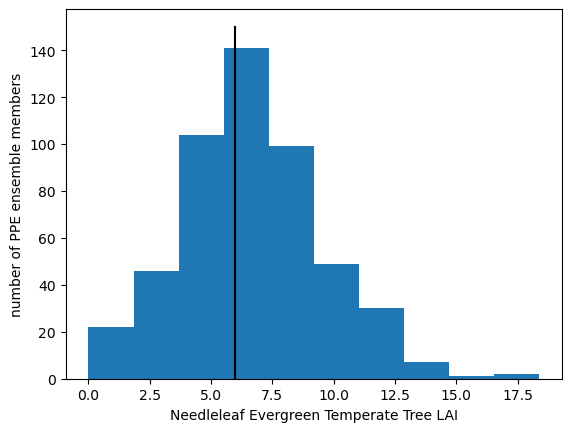

In [5]:
# take a look at the distribution of LAI data for needleleaf evergreen temperate trees (PFT=1)
var = pft_LAI.isel(pft=1).values
plt.hist(var,label = 'PPE LAI')
plt.plot([var[0], var[0]],[0,150],color='k',label='default CLM')
plt.xlabel('Needleleaf Evergreen Temperate Tree LAI')
plt.ylabel('number of PPE ensemble members')

In [6]:
# Read in the parameter sets 
# This is the input X data (CLM parameter settings for each ensemble member)
# Columns are CLM parameters and rows are PPE ensemble members (samples)
# Parameter space was sampled using Latin Hypercube scheme
# each column is normalized
lhckey = 'lhc220926.txt'
df = pd.read_csv(lhckey)
ppe_params = df.drop(columns='member')
ppe_params

,FUN_fracfixers,KCN,a_fix,crit_dayl,d_max,fff,froot_leaf,fstor2tran,grperc,jmaxb0,...,psi50,q10_mr,slatop,soilpsi_off,stem_leaf,sucsat_sf,theta_cj,tpu25ratio,tpuse_sf,wc2wjb0
0,0.778311,0.358026,0.255021,0.401235,0.797847,0.130074,0.938827,0.378388,0.196517,0.624727,...,0.196154,0.275884,0.762778,0.137397,0.113845,0.798198,0.036459,0.393617,0.078962,0.684588
1,0.319329,0.548803,0.630191,0.270024,0.536119,0.679190,0.672215,0.956630,0.934241,0.627186,...,0.816009,0.949813,0.717381,0.743697,0.127340,0.394660,0.093740,0.041084,0.275619,0.878455
2,0.876772,0.210794,0.662125,0.353350,0.140861,0.342557,0.275203,0.747737,0.823775,0.891879,...,0.995087,0.322946,0.474743,0.805385,0.249964,0.168115,0.282747,0.819746,0.840143,0.951915
3,0.412051,0.678111,0.398648,0.330947,0.326188,0.210967,0.327117,0.645703,0.777746,0.897482,...,0.328198,0.042303,0.766334,0.354093,0.916163,0.138359,0.635655,0.448417,0.342799,0.989434
4,0.045135,0.770734,0.298738,0.343413,0.747099,0.207547,0.488125,0.686079,0.459411,0.009303,...,0.602910,0.267256,0.176784,0.507355,0.646416,0.828712,0.466185,0.470941,0.357750,0.909412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.936317,0.335675,0.821711,0.767823,0.330586,0.745789,0.127834,0.424287,0.609700,0.286311,...,0.246081,0.700532,0.681519,0.206475,0.802992,0.453735,0.624163,0.206822,0.441036,0.411448
496,0.955479,0.845082,0.019274,0.324838,0.113533,0.540953,0.150098,0.011721,0.227892,0.006216,...,0.910214,0.993029,0.930575,0.653339,0.750147,0.475151,0.536766,0.994792,0.512649,0.000159
497,0.185969,0.996422,0.422209,0.365048,0.275200,0.320546,0.991583,0.543024,0.037573,0.802632,...,0.346204,0.008894,0.606076,0.406761,0.453041,0.047361,0.765972,0.242643,0.842275,0.731144
498,0.262130,0.912280,0.533934,0.997431,0.907613,0.991805,0.363534,0.886880,0.763445,0.192524,...,0.805913,0.401231,0.865736,0.573305,0.332778,0.352641,0.842942,0.715950,0.353015,0.358052


In [7]:
# Example input for metalearning:
X = ppe_params.values # 32 parameters
y = y_data.values # 13 PFTs

### Section 2: Example of training Gaussian Process emulators for each PFT
##### using ESEm package (which is built on GPflow)

In [14]:
! mamba env update -f environment.yml

[+] 0.0s
[+] 0.1s
conda-forge/linux-64 ━━━━╸━━━━━━━━━━━━━━━╸━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
conda-forge/noarch   ━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s[+] 0.2s
conda-forge/linux-64 ━━━━━╸━━━━━━━━━━━━━━━╸━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s
conda-forge/noarch   ━━━━━━━━━╸━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s[+] 0.3s
conda-forge/linux-64 ━━━━━━╸━━━━━━━━━━━━━━━━  57.0kB /  ??.?MB @ 224.2kB/s  0.3s
conda-forge/noarch   ━━━━━━━━━━╸━━━━━━━━━━━━  56.3kB /  ??.?MB @ 220.3kB/s  0.3s[+] 0.4s
conda-forge/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━   1.1MB /  ??.?MB @   3.0MB/s  0.4s
conda-forge/noarch   ━━━━━━━━━━━━╸━━━━━━━━━━   1.2MB /  ??.?MB @   3.2MB/s  0.4s[+] 0.5s
conda-forge/linux-64 ━━━━━━━━━━╸━━━━━━━━━━━━   1.9MB /  ??.?MB @   4.0MB/s  0.5s
conda-forge/noarch   ━━━━━━━━━━━━━━╸━━━━━━━━   2.0MB /  ??.?MB @   4.3MB/s  0.5s[+] 0.6s
conda-forge/linux-64 ━━━━━━━━━━━━━╸━━━━━━━━━   2.0MB /  ??.?MB @   3.6MB/s  0.6s
conda-forge/noarch   ━╸━━━━━━━━━━━━━━━╸━━━━━   2.8M

In [8]:
# or if that doesn't work:
! pip install esem[gpflow]

  Using cached ESEm-1.1.0-py3-none-any.whl (38 kB)
  Obtaining dependency information for tensorflow-probability from https://files.pythonhosted.org/packages/c7/ee/245010efe319c89772a2d3747a720434ffa9de49ec1fff2f7090e9affe98/tensorflow_probability-0.22.1-py2.py3-none-any.whl.metadata
  Using cached tensorflow_probability-0.22.1-py2.py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for gpflow from https://files.pythonhosted.org/packages/ab/f3/b8c7d439a29af63eacfec80f35cb1eefafafdd297ffbcf37066ec4e7117e/gpflow-2.9.0-py3-none-any.whl.metadata
  Using cached gpflow-2.9.0-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for check-shapes>=1.0.0 from https://files.pythonhosted.org/packages/f6/20/bffce56003970ece7fa393232140428325a004bfb0631edb4e2b99df63e9/check_shapes-1.1.1-py3-none-any.whl.metadata
  Using cached check_shapes-1.1.1-py3-none-any.whl.metadata (2.4 kB)
  Obtaining dependency information for deprecated from https://files.pythonhosted.org/pa

In [15]:
from esem import gp_model
from esem.utils import get_random_params
import gpflow
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

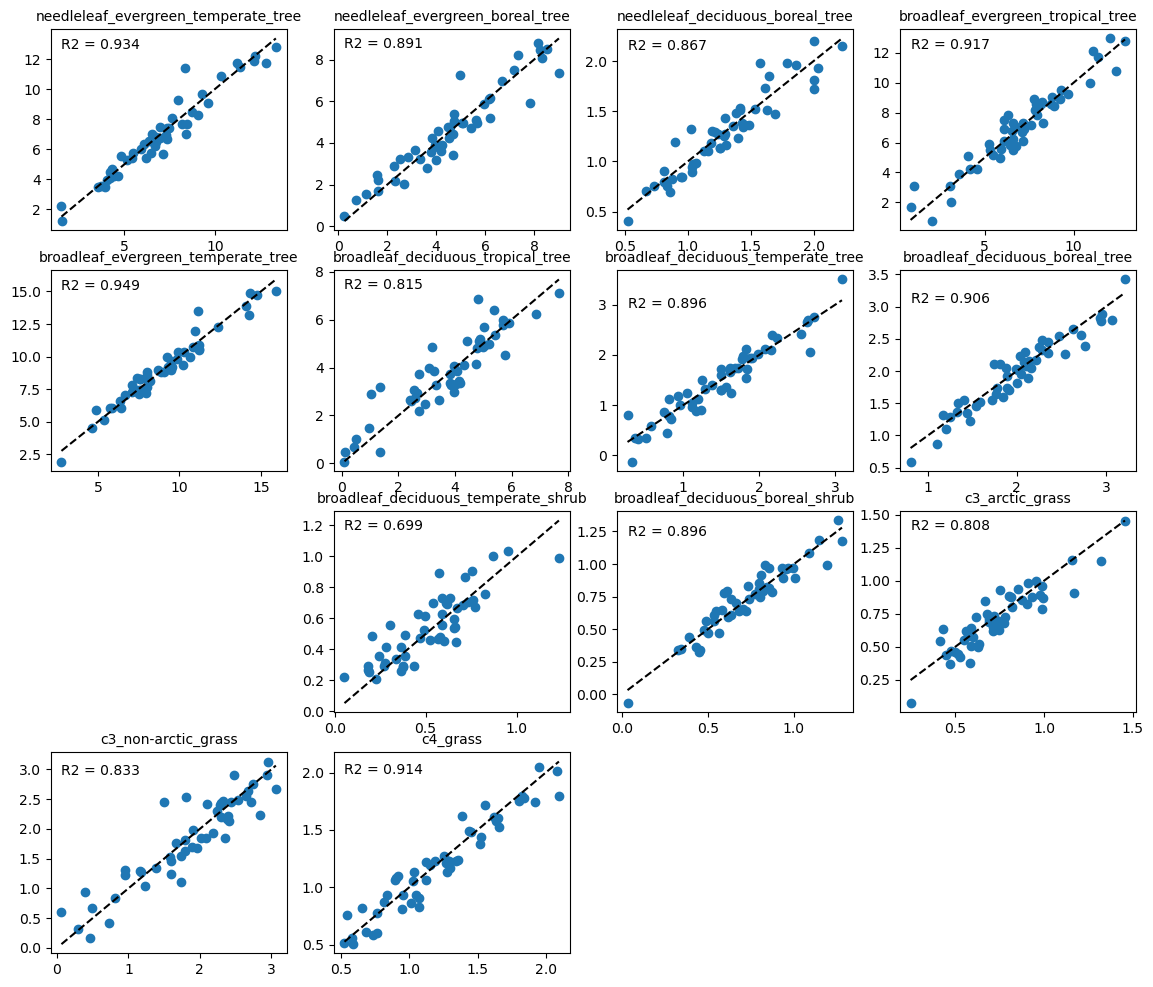

In [16]:
# Train individual GPR emulators for each PFT and save them in a dictionary
plt.figure(figsize=[14,12])
plt.rcParams.update({'font.size': 10})

emulator_dict = {}

for i,pft in enumerate(pft_ids):
    
    var_raw = pft_LAI.isel(pft=pft)[1:].values.reshape(-1, 1)
    Y = scaler.fit_transform(var_raw)

    n_test = 50 # number of ensemble members to withhold for validating emulator

    X_test, X_train = ppe_params[:n_test], ppe_params[n_test:] # no need to randomly sample from a Latin Hypercube
    y_test, y_train = Y[:n_test], Y[n_test:]

    emulator = gp_model(np.array(X_train),np.array(y_train)) # using default kernel (covariance structure)
    emulator.train()

    emulator_dict[pfts[pft]] = emulator
    
    #plot emulator validation
    y_pred, y_pred_var = emulator.predict(X_test.values)
    r2 = r2_score(y_test,y_pred)
    
    y_test_raw = scaler.inverse_transform(y_test)
    y_pred_raw = scaler.inverse_transform(y_pred)

    ax = plt.subplot(4,4,pft)
    ax.plot([min(y_test_raw),max(y_test_raw)],[min(y_test_raw),max(y_test_raw)],c='k',linestyle='--',label='1:1 line')
    ax.scatter(y_test_raw,y_pred_raw)
    ax.text(min(y_test_raw),max(y_test_raw)*0.95,'R2 = '+str(np.round(r2,3)),fontsize=10)
    ax.set_title(pfts[pft],fontsize = 10)

#plt.savefig('PFT_emulator_eval_GM-AM-LAI.png',dpi=200)

### Section 3: use the emulators to predict LAI for other CLM parameter combinations (not in the PPE)

In [77]:
n_params = len(ppe_params.columns)
new_sample = get_random_params(n_params,1000)
np.shape(new_sample)

(1000, 32)

In [84]:
# select the PFT and get emulator (model) from dictionary
p=1
pft = pfts[p]
model = emulator_dict[pft]

In [85]:
y_pred_new, _ = model.predict(new_sample)

In [86]:
var_raw = pft_LAI.isel(pft=p)[1:].values.reshape(-1, 1)
scaler.fit(var_raw)
lai_pred = scaler.inverse_transform(y_pred_new)

(array([  5.,  34., 127., 223., 252., 192., 111.,  34.,  19.,   3.]),
 array([-1.66046784,  0.19463498,  2.04973779,  3.9048406 ,  5.75994342,
         7.61504623,  9.47014904, 11.32525186, 13.18035467, 15.03545748,
        16.8905603 ]),
 <BarContainer object of 10 artists>)

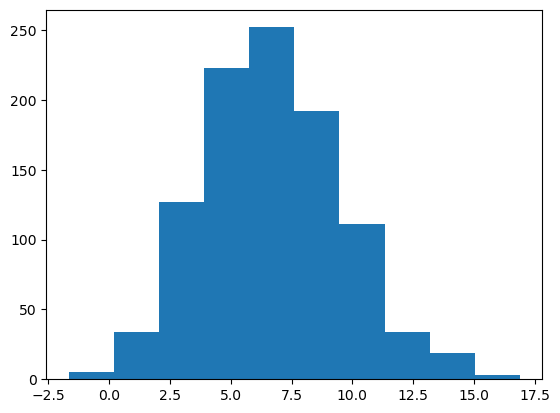

In [87]:
plt.hist(lai_pred)